# Signal-to-noise ratio calculation

Signal

$$ \mu_{knf} =  \sum_{ij} I_{nfij} \mathcal{N}(i, j \mid x_{knf}, y_{knf}, w_{knf}) $$

Noise

$$ \sigma^2_{knf} = \sigma^2_{\text{offset}} + \mu_{knf} \text{gain} $$

Signal-to-noise ratio

$$ \text{SNR}_{knf} = \dfrac{\mu_{knf} - b_{nf} - \mu_{\text{offset}}}{\sigma_{knf}} \text{ for } \theta_{nf} = k $$


$$ p(\mathcal{D}) $$

In [7]:
import matplotlib.pyplot as plt
from cosmos.models import Tracker

In [22]:
name = "h3000pi15lamda15"
path_data = "/shared/centaur/data/height_data/{}".format(name)
path_params = "/shared/centaur/data/height_data/{}/runs/tracker/v1.1.4prox/S1/control/lr0.005/bs5".format(name)

In [23]:
model = Tracker(S=1)
model.load(path_data, False, "cpu")
model.load_parameters(path_params)
snr = model.snr()

In [24]:
snr.mean()

tensor(2.7870)

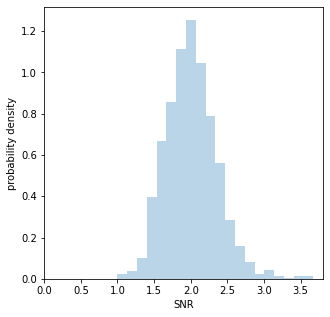

In [12]:
plt.figure(figsize=(5, 5))
plt.subplot(111)
plt.hist(snr.numpy(), bins=20, density=True, alpha=0.3)
plt.xlim(0,)
plt.ylabel("probability density")
plt.xlabel("SNR")
plt.show()

## Theoretical calculation

In [7]:
import torch
import pyro.distributions as dist

In [8]:
D = 14
background = 150
gain = torch.tensor(7.)
width = torch.tensor([1.4])

rv = dist.MultivariateNormal(
    torch.tensor([6.5, 6.5]),
    scale_tril=torch.eye(2) * width[..., None, None])

D_range = torch.arange(D, dtype=torch.float)
i_pixel, j_pixel = torch.meshgrid(D_range, D_range)
ij_pixel = torch.stack((i_pixel, j_pixel), dim=-1)

In [11]:
# calculate signal-to-noise ratio
heights = ["0300", "0500", "0750", "1000", "1500", "2000", "3000"]
snr = []
for h in heights:
    weights = rv.log_prob(ij_pixel).exp()
    print(weights.pow(2).sum().sqrt())
    signal = (weights ** 2 * float(h)).sum()
    noise = ((background) * gain).sqrt()
    snr.append(float(signal / noise))

tensor(0.2015)
tensor(0.2015)
tensor(0.2015)
tensor(0.2015)
tensor(0.2015)
tensor(0.2015)
tensor(0.2015)


In [12]:
snr

[0.37588992714881897,
 0.6264832615852356,
 0.9397249221801758,
 1.2529665231704712,
 1.8794498443603516,
 2.5059330463409424,
 3.758899688720703]